# Display origin of prototypes

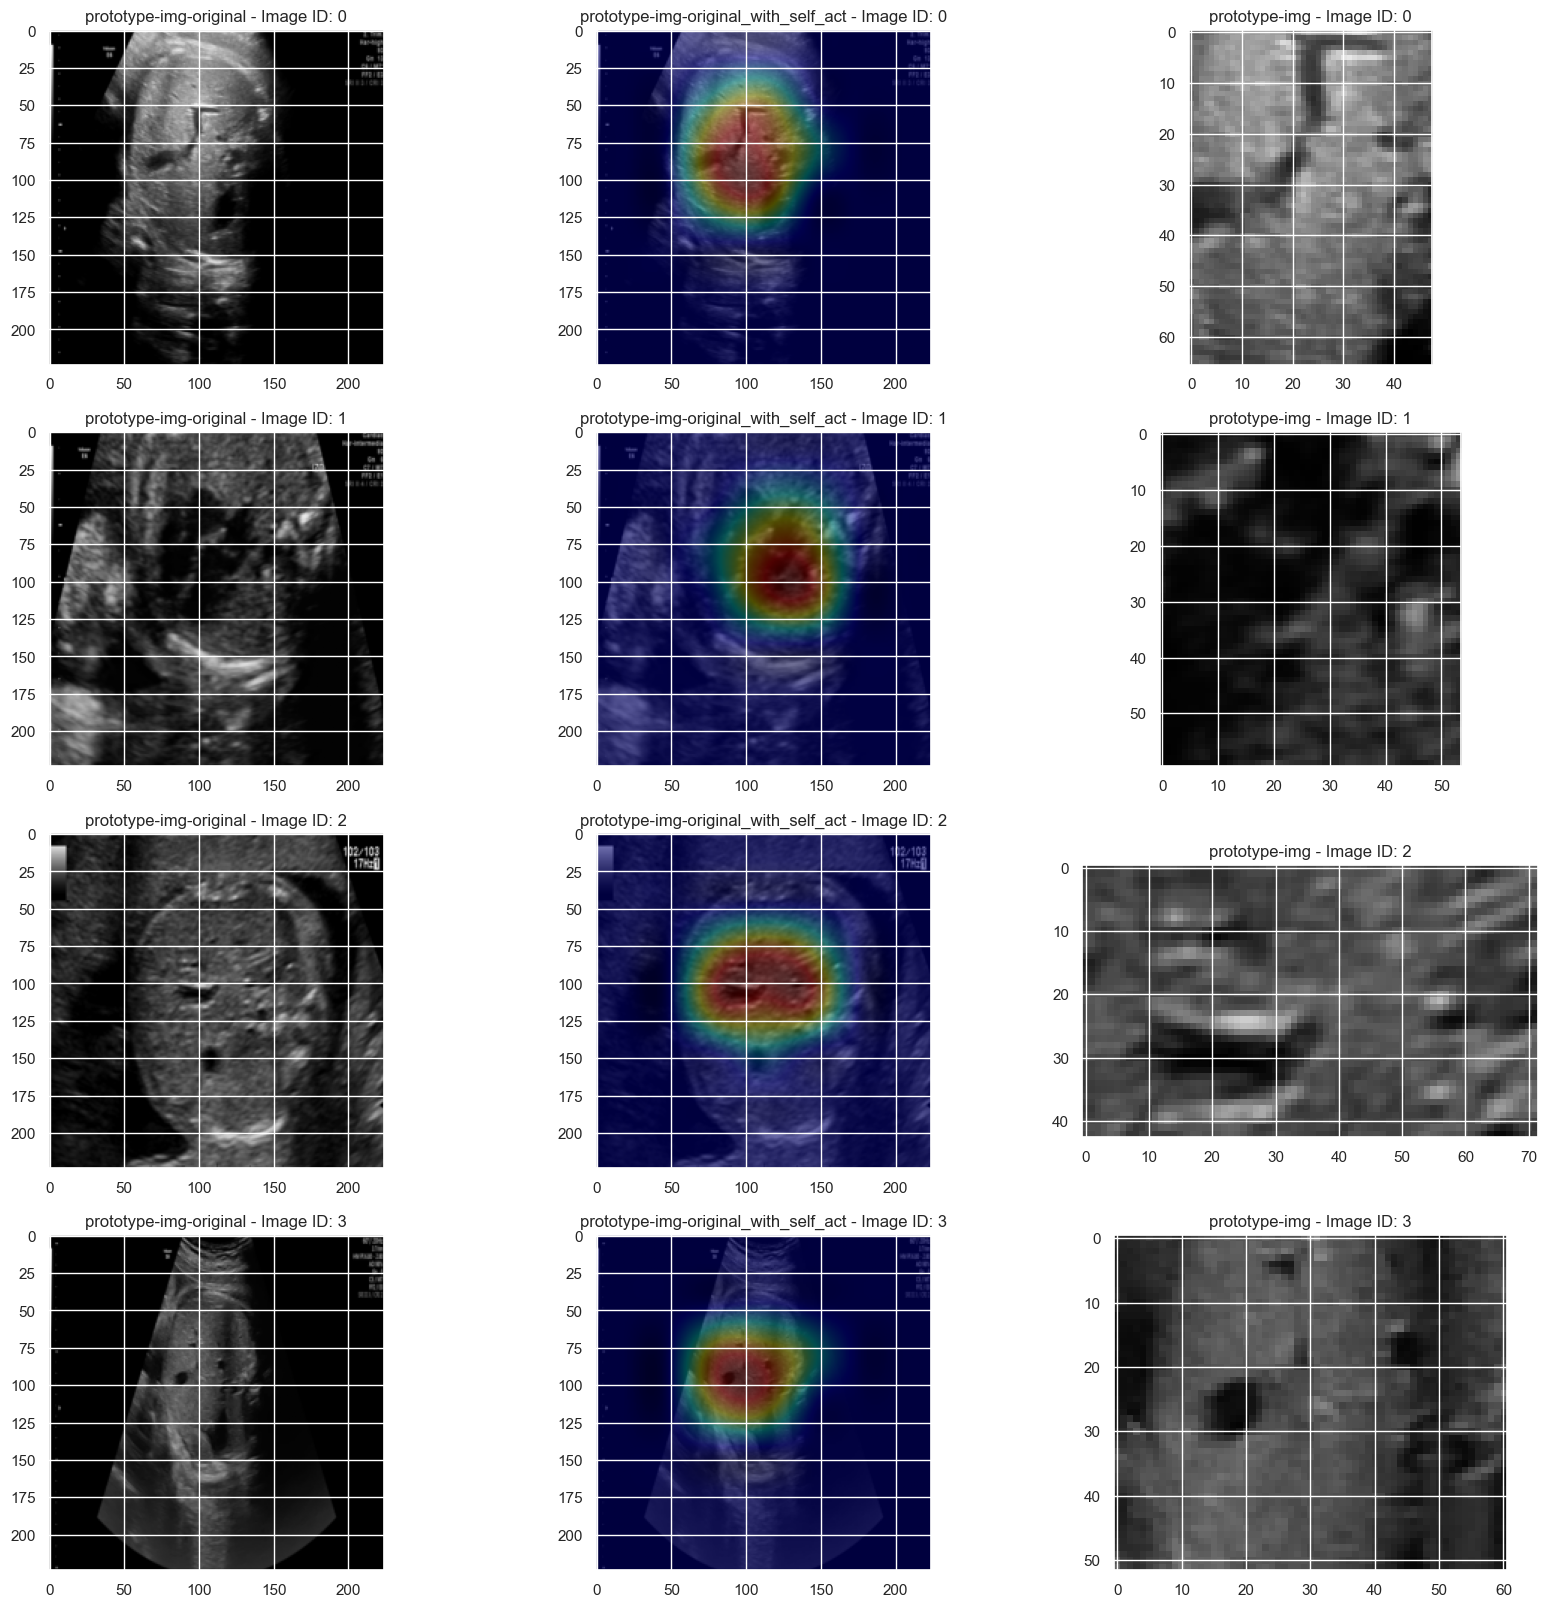

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
#os.chdir("../Prototype Analysis")
#a = np.loadtxt("../Data/CUB_200_2011/CUB_200_2011/train_test_split.txt",delimiter=" ")

img_types = ["prototype-img-original","prototype-img-original_with_self_act","prototype-img"]


###########
prototype_ids = [0,1,2,3]
###########

fig, axs = plt.subplots(len(prototype_ids),3,figsize=(20,20))

for j,id in enumerate(prototype_ids):
    for i, img_type in enumerate(img_types):
        a = "img/epoch-10/" +img_type + str(id) + ".png"
        im = plt.imread(a)
        axs[j,i].imshow(im)
        axs[j,i].set_title(img_type + f" - Image ID: {id}")




# Analyze .npy files

In [2]:
base = "img/epoch-10/"
f1 = base + "bb-receptive_field10.npy" # --> Activation pattern
f2 = base + "bb10.npy" # --> Activation pattern
f3_base = base + "prototype-self-act" # --> Activation pattern in latent space
f4 = "prune_info.npy"

rec_filed = np.load(f1)
print(rec_filed.shape)

bb20 = np.load(f2)
print(bb20.shape)
print(bb20[:10,:])

self_act = np.load(f3_base + "4" + ".npy") 
print(self_act.shape) 

(68, 6)
(68, 6)
[[ 52  51 117  75 123   0]
 [144  62 122 100 154   0]
 [ 29  77 120  76 148   0]
 [  6  69 121  70 131   0]
 [ 52  49 117  76 122   0]
 [264  71 121  90 154   0]
 [104  68 122 101 158   0]
 [114  69 123 100 156   0]
 [  6  70 121  71 135   0]
 [ 10  70 123  69 129   0]]
(7, 7)


In [4]:
import torch
import os
import umap
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
import numpy as np

# * get class info and prepare coloring
class_map = {0:"Fetal_abdomen",1:"Fetal_femur",2:"Fetal_thorax",3:"Maternal_cervix",4:"Other",5:"Trans-cerebellum",6:"Trans-thalamic",7:"Trans-ventricular"}
#colors = bb20[:,-1]
#labels = [class_map[el] for el in list(set(colors))]

# * load prototypes
if os.getcwd().split("/")[-1] != "ProtoPNet":
    print(os.getcwd())
    os.chdir("../../ProtoPNet")
path_to_model = "../Prototype Analysis/FETAL_DB/10prune0.8960.pth"
ppnet = torch.load(path_to_model,map_location=torch.device('cpu'))
prototypes = ppnet.prototype_vectors.flatten(start_dim=1).detach().numpy()
os.chdir("../Prototype Analysis/FETAL_DB")

print(prototypes.shape)
print(len(np.unique(prototypes,axis=1)))

/Users/mats/Desktop/Master/DTU Sem 3 - WS2223/Deep Learning/Project/Code/Prototype Analysis/FETAL_DB_BEST
(70, 128)
70


# Best Model - Visualization of latent space

/Users/mats/Desktop/Master/DTU Sem 3 - WS2223/Deep Learning/Project/Code/Prototype Analysis/FETAL_DB
(68, 256)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


Text(0, 0.5, 'UMAP 2')

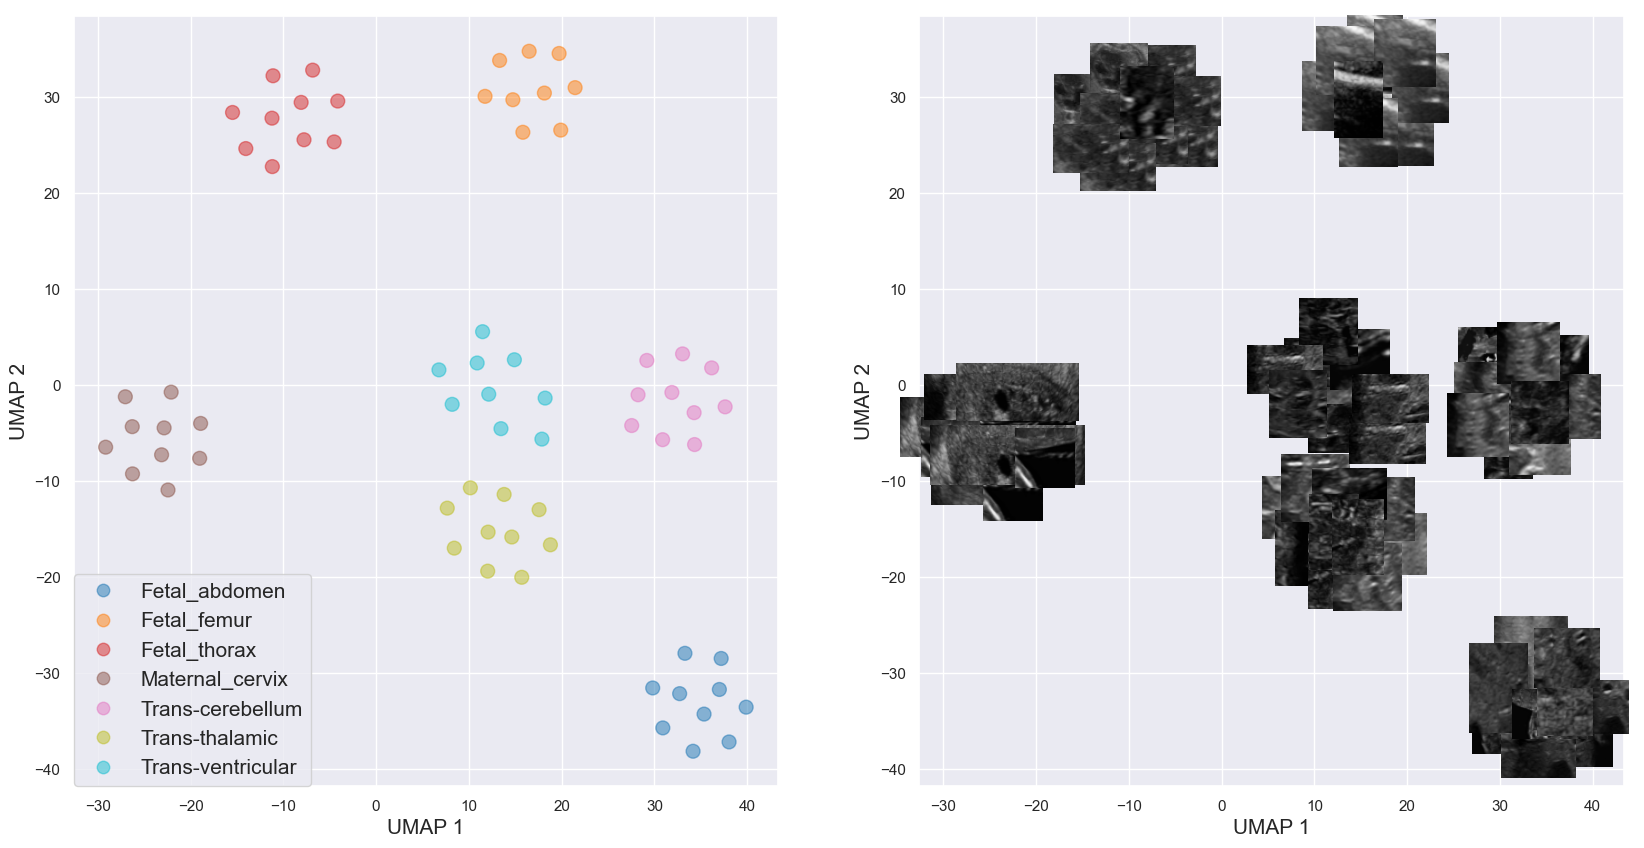

In [12]:
import torch
import os
import umap
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches

# * load class info from file
base = "img/epoch-10/"
f2 = base + "bb10.npy" # --> Activation pattern
bb10 = np.load(f2) 

# * get class info and prepare coloring
class_map = {0:"Fetal_abdomen",1:"Fetal_femur",2:"Fetal_thorax",3:"Maternal_cervix",4:"Trans-cerebellum",5:"Trans-thalamic",6:"Trans-ventricular"}
colors = bb20[:,-1]
labels = [class_map[el] for el in list(set(colors))]

# * load prototypes
if os.getcwd().split("/")[-1] != "ProtoPNet":
    print(os.getcwd())
    os.chdir("../../ProtoPNet")
path_to_model = "../Prototype Analysis/FETAL_DB_BEST/10_19_26prune0.9421.pth"
ppnet = torch.load(path_to_model,map_location=torch.device('cpu'))
prototypes = ppnet.prototype_vectors.flatten(start_dim=1).detach().numpy()
os.chdir("../Prototype Analysis/FETAL_DB")
print(prototypes.shape)

# * initialize UMAP and get 2d embedding
reducer = umap.UMAP(n_neighbors=50,metric="euclidean",min_dist=5, spread=5, random_state=101)
embedding = reducer.fit_transform(prototypes)
xs = embedding[:,0]
ys = embedding[:,1]

# * Plot prototypes in 2d
sns.set()
fig, ax = plt.subplots(1,2,figsize=(20,10))
#ax[0].set_title("\nLatent Prototype Space Visualized in 2D\n",{'fontsize': 20})
ax[0].set_xlabel("UMAP 1",{'fontsize': 15})
ax[0].set_ylabel("UMAP 2",{'fontsize': 15})
scatter = ax[0].scatter(xs, ys,c=colors,cmap="tab10",alpha=0.5, s=100)
handles, _ = scatter.legend_elements()
lgnd = ax[0].legend(handles,labels, borderaxespad=0., fontsize=15, markerscale=1.5) #bbox_to_anchor=(1.05, 1),loc='upper left'

# * Plot prototypes with corresponding images
artists = []
zoom = 0.8
for id, (x0, y0) in enumerate(zip(xs, ys)):
    a = "img/epoch-10/" + img_types[-1] + str(id) + ".png"
    im = plt.imread(a)
    (height, width) = im.shape[:-1]
    im_box = OffsetImage(im, zoom=zoom)
    ab = AnnotationBbox(im_box, (x0, y0), xycoords='data', frameon=False)
    artists.append(ax[1].add_artist(ab))
    # rect = patches.Rectangle((x0, y0), w, h, linewidth=3, edgecolor='r', facecolor='none')
    # ax[1].add_patch(rect)
ax[1].update_datalim(np.column_stack([xs, ys]))
ax[1].autoscale()

ax[1].set_xlabel("UMAP 1",{'fontsize': 15})
ax[1].set_ylabel("UMAP 2",{'fontsize': 15})




In [1]:
import matplotlib.colors as mcolors

classes,counts = np.unique(colors, return_counts=True)
colors_new = list(mcolors.TABLEAU_COLORS.keys())[:len(classes)]
barplot = plt.bar(classes,counts, label=labels, color=colors_new)
plt.legend(labels)
plt.title("Prototypes per Class")


NameError: name 'np' is not defined

## With PCA

/Users/mats/Desktop/Master/DTU Sem 3 - WS2223/Deep Learning/Project/Code/Prototype Analysis/FETAL_DB
(68, 256)


0.05028665

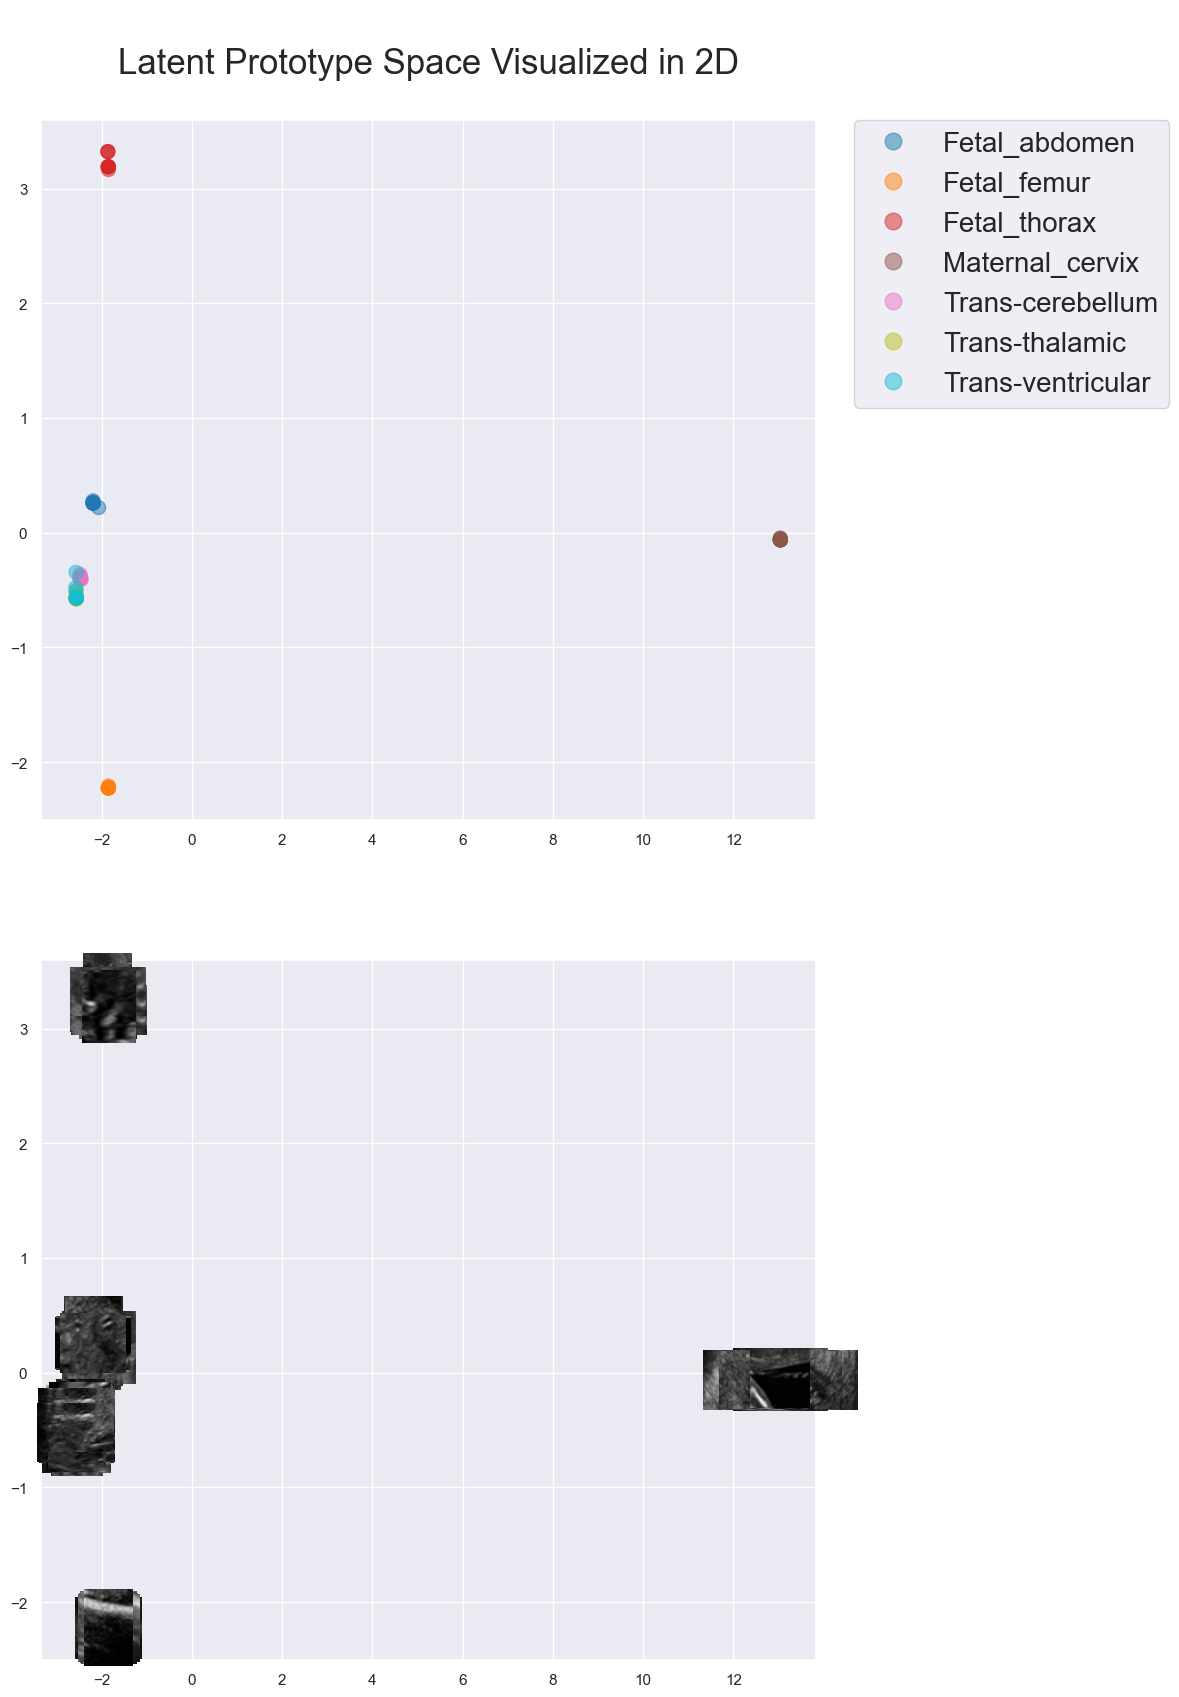

In [8]:
import torch
import os
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches

# * load class info from file
base = "img/epoch-10/"
f2 = base + "bb10.npy" # --> Activation pattern
bb10 = np.load(f2) 

# * get class info and prepare coloring
class_map = {0:"Fetal_abdomen",1:"Fetal_femur",2:"Fetal_thorax",3:"Maternal_cervix",4:"Trans-cerebellum",5:"Trans-thalamic",6:"Trans-ventricular"}
colors = bb10[:,-1]
labels = [class_map[el] for el in list(set(colors))]

# * load prototypes
if os.getcwd().split("/")[-1] != "ProtoPNet":
    print(os.getcwd())
    os.chdir("../../ProtoPNet")
path_to_model = "../Prototype Analysis/FETAL_DB_BEST/10_19_26prune0.9421.pth"
ppnet = torch.load(path_to_model,map_location=torch.device('cpu'))
prototypes = ppnet.prototype_vectors.flatten(start_dim=1).detach().numpy()
os.chdir("../Prototype Analysis/FETAL_DB_BEST")
print(prototypes.shape)

# * initialize UMAP and get 2d embedding
reducer = PCA()
embedding = reducer.fit_transform(prototypes)
xs = embedding[:,0]
ys = embedding[:,1]

# * Plot prototypes in 2d
sns.set()
fig, ax = plt.subplots(2,1,figsize=(10,20))
ax[0].set_title("\nLatent Prototype Space Visualized in 2D\n",{'fontsize': 25})
scatter = ax[0].scatter(xs, ys,c=colors,cmap="tab10",alpha=0.5, s=100)
handles, _ = scatter.legend_elements()
lgnd = ax[0].legend(handles,labels,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0., fontsize=20, markerscale=2)

# * Plot prototypes with corresponding images
artists = []
zoom = 0.8
for id, (x0, y0) in enumerate(zip(xs, ys)):
    a = "img/epoch-10/" + img_types[-1] + str(id) + ".png"
    im = plt.imread(a)
    (height, width) = im.shape[:-1]
    im_box = OffsetImage(im, zoom=zoom)
    ab = AnnotationBbox(im_box, (x0, y0), xycoords='data', frameon=False)
    artists.append(ax[1].add_artist(ab))
    # rect = patches.Rectangle((x0, y0), w, h, linewidth=3, edgecolor='r', facecolor='none')
    # ax[1].add_patch(rect)
ax[1].update_datalim(np.column_stack([xs, ys]))
ax[1].autoscale()
reducer.explained_variance_ratio_[2]



## REPORT


/Users/mats/Desktop/Master/DTU Sem 3 - WS2223/Deep Learning/Project/Code/Prototype Analysis/FETAL_DB_BEST
/Users/mats/Desktop/Master/DTU Sem 3 - WS2223/Deep Learning/Project/Code/Prototype Analysis/FETAL_DB_BEST
(68, 256)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


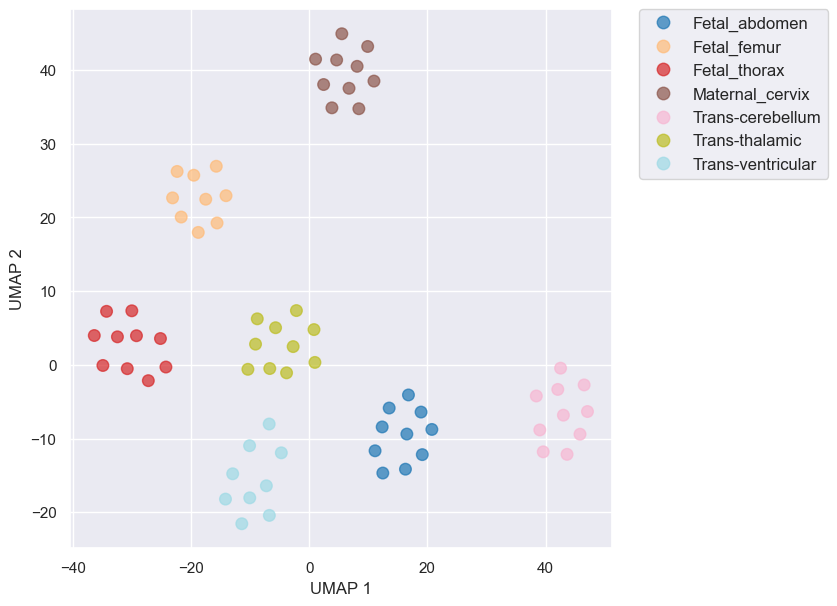

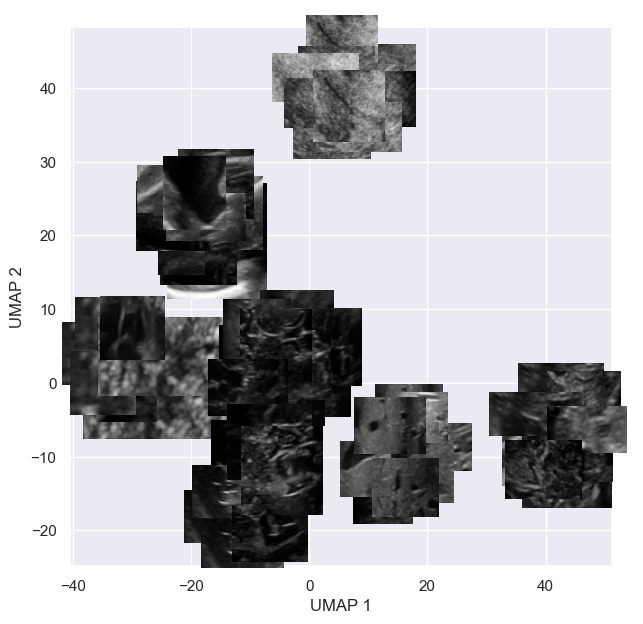

In [3]:
import torch
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
import umap

print(os.getcwd())
os.chdir("/Users/mats/Desktop/Master/DTU Sem 3 - WS2223/Deep Learning/Project/Code/Prototype Analysis/FETAL_DB_BEST")

# * load class info from file
base = "img/epoch-10/"
f2 = base + "bb10.npy" # --> Activation pattern
bb10 = np.load(f2) 

# * get class info and prepare coloring
class_map = {0:"Fetal_abdomen",1:"Fetal_femur",2:"Fetal_thorax",3:"Maternal_cervix",4:"Trans-cerebellum",5:"Trans-thalamic",6:"Trans-ventricular"}
colors = bb10[:,-1]
labels = [class_map[el] for el in list(set(colors))]

# * load prototypes
if os.getcwd().split("/")[-1] != "ProtoPNet":
    print(os.getcwd())
    os.chdir("../../ProtoPNet")
path_to_model = "../Prototype Analysis/FETAL_DB_BEST/10_19_26prune0.9421.pth"
ppnet = torch.load(path_to_model,map_location=torch.device('cpu'))
prototypes = ppnet.prototype_vectors.flatten(start_dim=1).detach().numpy()
os.chdir("../Prototype Analysis/FETAL_DB_BEST")
print(prototypes.shape)

# * initialize UMAP and get 2d embedding
reducer = umap.UMAP(n_neighbors=20,metric="euclidean",min_dist=5, spread=5, random_state=103)
embedding = reducer.fit_transform(prototypes)
xs = embedding[:,0]
ys = embedding[:,1]

# * Plot prototypes in 2d
sns.set()
fig, ax = plt.subplots(1,1,figsize=(7,7))
#ax[0].set_title("\nLatent Prototype Space Visualized in 2D\n",{'fontsize': 20})
ax.set_xlabel("UMAP 1",{'fontsize': 12})
ax.set_ylabel("UMAP 2",{'fontsize': 12})
scatter = ax.scatter(xs, ys,c=colors,cmap="tab20", alpha=0.7, s=70)
handles, _ = scatter.legend_elements(num=len(labels))
lgnd = ax.legend(handles,labels,borderaxespad=0., fontsize=12, markerscale=1.5 ,bbox_to_anchor=(1.05, 1),loc='upper left')
plt.savefig("../figures/umap_birds.png",bbox_inches='tight')


# # * Plot prototypes with corresponding images
fig, ax = plt.subplots(1,1,figsize=(7,7))
artists = []
zoom = 0.8
for id, (x0, y0) in enumerate(zip(xs, ys)):
    a = "img/epoch-10/" + img_types[-1] + str(id) + ".png"
    im = plt.imread(a)
    (height, width) = im.shape[:-1]
    im_box = OffsetImage(im, zoom=zoom)
    ab = AnnotationBbox(im_box, (x0, y0), xycoords='data', frameon=False)
    artists.append(ax.add_artist(ab))
    # rect = patches.Rectangle((x0, y0), w, h, linewidth=3, edgecolor='r', facecolor='none')
    # ax[1].add_patch(rect)
ax.update_datalim(np.column_stack([xs, ys]))
ax.autoscale()

ax.set_xlabel("UMAP 1",{'fontsize': 12})
ax.set_ylabel("UMAP 2",{'fontsize': 12})

plt.savefig("../figures/umap_2_.png",bbox_inches='tight')

## PCA

/Users/mats/Desktop/Master/DTU Sem 3 - WS2223/Deep Learning/Project/Code/Prototype Analysis/FETAL_DB_BEST
/Users/mats/Desktop/Master/DTU Sem 3 - WS2223/Deep Learning/Project/Code/Prototype Analysis/FETAL_DB_BEST
(68, 256)


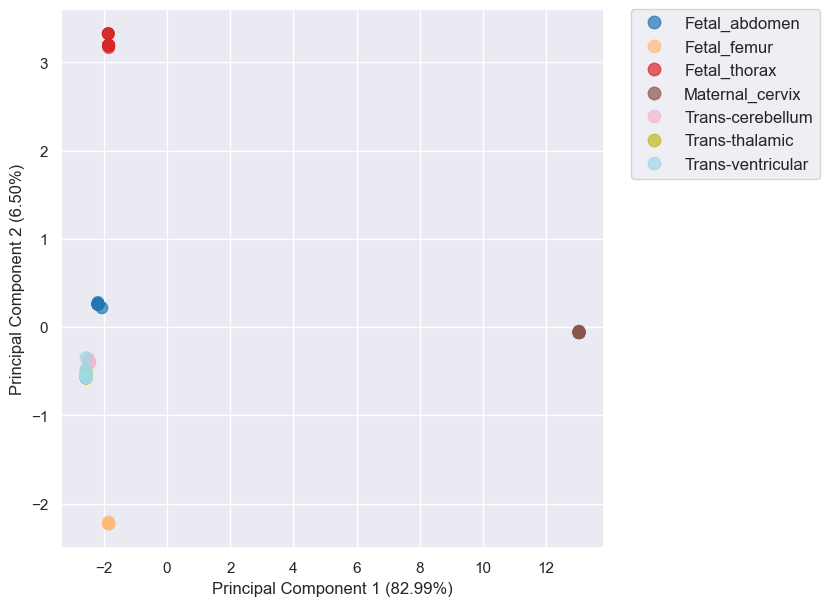

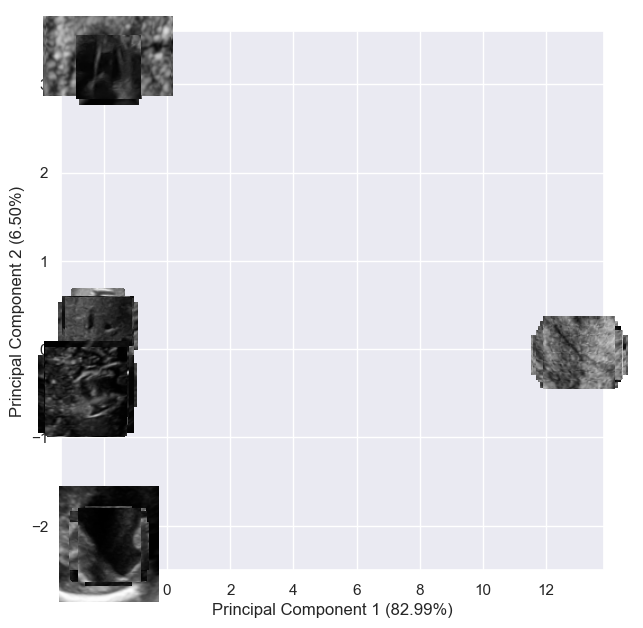

In [28]:
import torch
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
import seaborn as sns
import numpy as np

print(os.getcwd())
os.chdir("/Users/mats/Desktop/Master/DTU Sem 3 - WS2223/Deep Learning/Project/Code/Prototype Analysis/FETAL_DB_BEST")

# * load class info from file
base = "img/epoch-10/"
f2 = base + "bb10.npy" # --> Activation pattern
bb10 = np.load(f2) 

# * get class info and prepare coloring
class_map = {0:"Fetal_abdomen",1:"Fetal_femur",2:"Fetal_thorax",3:"Maternal_cervix",4:"Trans-cerebellum",5:"Trans-thalamic",6:"Trans-ventricular"}
colors = bb10[:,-1]
labels = [class_map[el] for el in list(set(colors))]

# * load prototypes
if os.getcwd().split("/")[-1] != "ProtoPNet":
    print(os.getcwd())
    os.chdir("../../ProtoPNet")
path_to_model = "../Prototype Analysis/FETAL_DB_BEST/10_19_26prune0.9421.pth"
ppnet = torch.load(path_to_model,map_location=torch.device('cpu'))
prototypes = ppnet.prototype_vectors.flatten(start_dim=1).detach().numpy()
os.chdir("../Prototype Analysis/FETAL_DB_BEST")
print(prototypes.shape)

# * initialize UMAP and get 2d embedding
reducer = PCA()
embedding = reducer.fit_transform(prototypes)
xs = embedding[:,0]
ys = embedding[:,1]
ex_var = reducer.explained_variance_ratio_

# * Plot prototypes in 2d
sns.set()
fig, ax = plt.subplots(1,1,figsize=(7,7))
#ax[0].set_title("\nLatent Prototype Space Visualized in 2D\n",{'fontsize': 20})
ax.set_xlabel(f"Principal Component 1 ({ex_var[0]*100:.2f}%)",{'fontsize': 12})
ax.set_ylabel(f"Principal Component 2 ({ex_var[1]*100:.2f}%)",{'fontsize': 12})
scatter = ax.scatter(xs, ys,c=colors,cmap="tab20", alpha=0.7, s=70)
handles, _ = scatter.legend_elements(num=len(labels))
lgnd = ax.legend(handles,labels,borderaxespad=0., fontsize=12, markerscale=1.5 ,bbox_to_anchor=(1.05, 1),loc='upper left')
plt.savefig("../figures/PCA_densenet.png",bbox_inches='tight')


# # * Plot prototypes with corresponding images
fig, ax = plt.subplots(1,1,figsize=(7,7))
artists = []
zoom = 0.8
for id, (x0, y0) in enumerate(zip(xs, ys)):
    a = "img/epoch-10/" + img_types[-1] + str(id) + ".png"
    im = plt.imread(a)
    (height, width) = im.shape[:-1]
    im_box = OffsetImage(im, zoom=zoom)
    ab = AnnotationBbox(im_box, (x0, y0), xycoords='data', frameon=False)
    artists.append(ax.add_artist(ab))
    # rect = patches.Rectangle((x0, y0), w, h, linewidth=3, edgecolor='r', facecolor='none')
    # ax[1].add_patch(rect)
ax.update_datalim(np.column_stack([xs, ys]))
ax.autoscale()

ax.set_xlabel(f"Principal Component 1 ({ex_var[0]*100:.2f}%)",{'fontsize': 12})
ax.set_ylabel(f"Principal Component 2 ({ex_var[1]*100:.2f}%)",{'fontsize': 12})

plt.savefig("../figures/PCA_2_densenet.png",bbox_inches='tight')